<a href="https://colab.research.google.com/github/abhishekchandar/IN-rainfall-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [7]:
India = pd.read_csv("rainfall in india 1901-2015.csv")

In [8]:
India.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [9]:
print('Rows     :',India.shape[0])
print('Columns  :',India.shape[1])
print('\nFeatures :\n     :',India.columns.tolist())
print('\nMissing values    :',India.isnull().values.sum())
print('\nUnique values :  \n',India.nunique())

Rows     : 4116
Columns  : 19

Features :
     : ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

Missing values    : 134

Unique values :  
 SUBDIVISION      36
YEAR            115
JAN             802
FEB             898
MAR             978
APR            1234
MAY            1731
JUN            2722
JUL            3050
AUG            2913
SEP            2632
OCT            1939
NOV            1239
DEC             801
ANNUAL         3712
Jan-Feb        1220
Mar-May        2262
Jun-Sep        3683
Oct-Dec        2389
dtype: int64


,Total,Percent
ANNUAL,26,0.006317
Oct-Dec,13,0.003158
NOV,11,0.002672
DEC,10,0.002430
Jun-Sep,10,0.002430


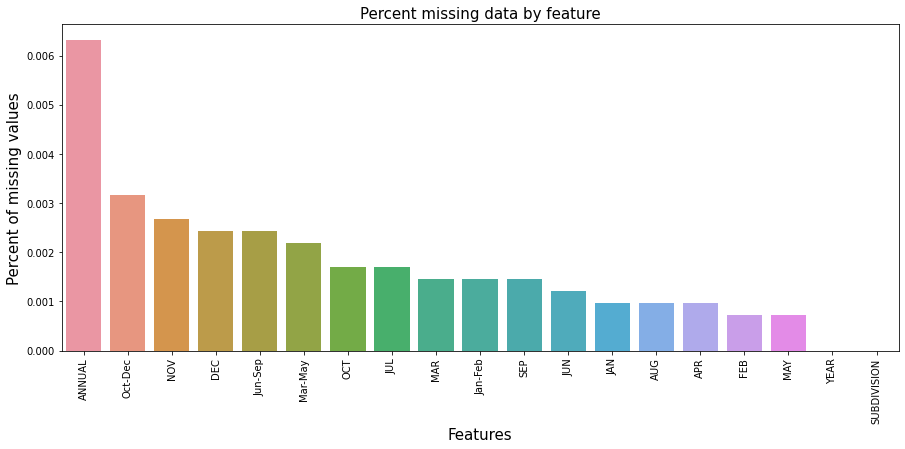

In [10]:
total = India.isnull().sum().sort_values(ascending=False)
percent = (India.isnull().sum()/India.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [11]:
India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [12]:
India['JAN'].fillna((India['JAN'].mean()), inplace=True)
India['FEB'].fillna((India['FEB'].mean()), inplace=True)
India['MAR'].fillna((India['MAR'].mean()), inplace=True)
India['APR'].fillna((India['APR'].mean()), inplace=True)
India['MAY'].fillna((India['MAY'].mean()), inplace=True)
India['JUN'].fillna((India['JUN'].mean()), inplace=True)
India['JUL'].fillna((India['JUL'].mean()), inplace=True)
India['AUG'].fillna((India['AUG'].mean()), inplace=True)
India['SEP'].fillna((India['SEP'].mean()), inplace=True)
India['OCT'].fillna((India['OCT'].mean()), inplace=True)
India['NOV'].fillna((India['NOV'].mean()), inplace=True)
India['DEC'].fillna((India['DEC'].mean()), inplace=True)
India['ANNUAL'].fillna((India['ANNUAL'].mean()), inplace=True)
India['Jan-Feb'].fillna((India['Jan-Feb'].mean()), inplace=True)
India['Mar-May'].fillna((India['Mar-May'].mean()), inplace=True)
India['Jun-Sep'].fillna((India['Jun-Sep'].mean()), inplace=True)
India['Oct-Dec'].fillna((India['Oct-Dec'].mean()), inplace=True)

In [13]:
India.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


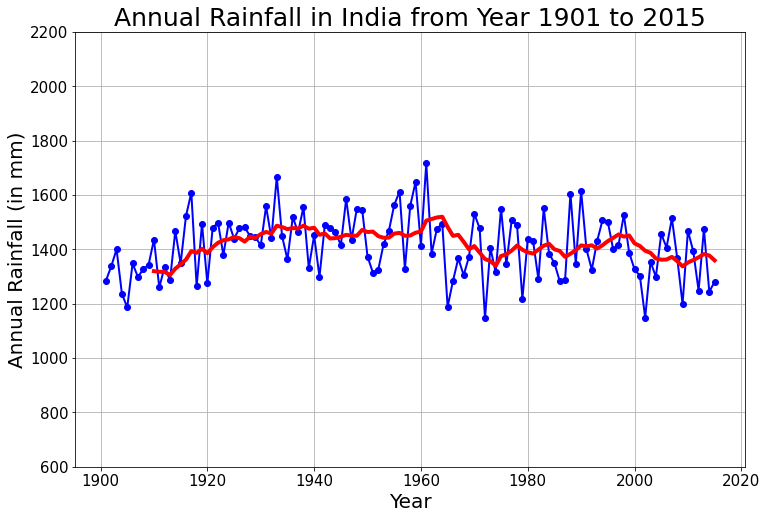

In [14]:
ax=India.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(600,2200),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
India['MA10'] = India.groupby('YEAR').mean()['ANNUAL'].rolling(10).mean()
India.MA10.plot(color='r',linewidth=4)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from Year 1901 to 2015',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()